In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

### Read bitcoin data from coinmarket csv file

In [2]:
timeSeries=pd.read_csv("coinmarket.csv")
timeSeries

,Unnamed: 0,Date,Open*,High,Low,Close**,Volume,Market Cap
0,0,"Nov 21, 2019",8023.64,8110.10,7597.38,7642.75,"22,514,243,371","138,031,885,379"
1,1,"Nov 20, 2019",8203.61,8237.24,8010.51,8027.27,"20,764,300,437","144,962,727,398"
2,2,"Nov 19, 2019",8305.13,8408.52,8099.96,8206.15,"21,083,613,816","148,178,376,843"
3,3,"Nov 18, 2019",8573.98,8653.28,8273.57,8309.29,"21,579,470,673","150,025,712,267"
4,4,"Nov 17, 2019",8549.47,8727.79,8500.97,8577.98,"18,668,638,897","154,861,842,425"
...,...,...,...,...,...,...,...,...
2394,2394,"May 02, 2013",116.38,125.60,92.28,105.21,0,"1,168,517,495"
2395,2395,"May 01, 2013",139.00,139.89,107.72,116.99,0,"1,298,954,594"
2396,2396,"Apr 30, 2013",144.00,146.93,134.05,139.00,0,"1,542,813,125"
2397,2397,"Apr 29, 2013",134.44,147.49,134.00,144.54,0,"1,603,768,865"


### As observed from the above dataframe, the data needs to be pre-processed
### Let's drop the columns which are not required for the analysis

In [3]:
timeSeries.drop('Unnamed: 0', axis=1, inplace=True)
timeSeries.drop('Open*', axis=1, inplace=True)
timeSeries.drop('High', axis=1, inplace=True)
timeSeries.drop('Low', axis=1, inplace=True)
timeSeries.drop('Volume', axis=1, inplace=True)
timeSeries.drop('Market Cap', axis=1, inplace=True)

### The values in the 'Date' column need to be converted to 'Datetime' format

In [4]:
timeSeries['Date'] = pd.to_datetime(timeSeries['Date'])
timeSeries.set_index('Date', inplace=True)

C:\Users\ketan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)
C:\Users\ketan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)
C:\Users\ketan\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\ketan\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

                             ARIMA Model Results                              
Dep. Variable:              D.Close**   No. Observations:                 2398
Model:                ARIMA(10, 1, 0)   Log Likelihood              -16589.043
Method:                       css-mle   S.D. of innovations            244.415
Date:                Tue, 17 Dec 2019   AIC                          33202.086
Time:                        23:40:43   BIC                          33271.475
Sample:                    11-20-2019   HQIC                         33227.331
                         - 04-28-2013                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.0296      6.042     -0.501      0.616     -14.872       8.813
ar.L1.D.Close**      0.0515      0.020      2.545      0.011       0.012       0.091
ar.L2.D.Close**     -0.0372 

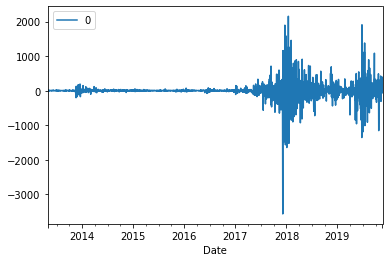

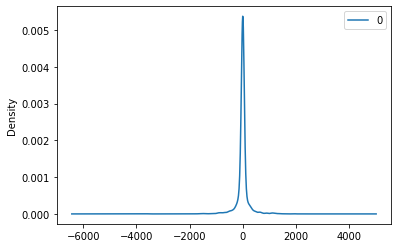

                 0
count  2398.000000
mean     -0.078472
std     244.475836
min   -3571.014055
25%     -14.606982
50%       1.772178
75%      12.930045
max    2156.401300


In [5]:
# fit model
model = ARIMA(timeSeries, order=(10,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [6]:
timeSeries = timeSeries.sort_values('Date')

### Sort the 'Date' column in ascending order

In [7]:
timeSeries

,Close**
Date,
2013-04-28,134.21
2013-04-29,144.54
2013-04-30,139.00
2013-05-01,116.99
2013-05-02,105.21
...,...
2019-11-17,8577.98
2019-11-18,8309.29
2019-11-19,8206.15


### Split the data into train and test sets. Train set is 80% of the original set and test set is 20%

In [8]:
X = timeSeries.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]

In [9]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(10,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=8133.971946, expected=8180.480000
predicted=8150.632474, expected=7780.440000
predicted=7867.605727, expected=7624.910000
predicted=7699.187910, expected=7567.150000
predicted=7643.468606, expected=7434.390000
predicted=7415.546629, expected=7032.850000
predicted=6951.818401, expected=7068.480000
predicted=7140.150339, expected=6951.800000
predicted=6979.006252, expected=6753.120000
predicted=6741.555763, expected=6305.800000
predicted=6198.561071, expected=6568.230000
predicted=6586.056851, expected=6184.710000
predicted=6126.231393, expected=6295.730000
predicted=6290.124973, expected=6322.690000
predicted=6231.026214, expected=6297.570000
predicted=6326.028697, expected=6199.710000
predicted=6131.219630, expected=6308.520000
predicted=6287.832850, expected=6334.730000
predicted=6313.660297, expected=6580.630000
predicted=6521.025446, expected=6423.760000
predicted=6409.930757, expected=6506.070000
predicted=6489.605148, expected=6308.530000
predicted=6293.710154, expected=

predicted=3479.488777, expected=3521.060000
predicted=3528.694526, expected=3464.010000
predicted=3471.034543, expected=3459.150000
predicted=3447.404670, expected=3466.360000
predicted=3459.662160, expected=3413.770000
predicted=3402.168645, expected=3399.470000
predicted=3388.419406, expected=3666.780000
predicted=3696.962618, expected=3671.200000
predicted=3670.134343, expected=3690.190000
predicted=3688.754514, expected=3648.430000
predicted=3631.109999, expected=3653.530000
predicted=3682.090837, expected=3632.070000
predicted=3612.722258, expected=3616.880000
predicted=3606.713049, expected=3620.810000
predicted=3625.988300, expected=3629.790000
predicted=3646.601070, expected=3673.840000
predicted=3719.900585, expected=3915.710000
predicted=3932.522638, expected=3947.090000
predicted=3945.018718, expected=3999.820000
predicted=3994.547346, expected=3954.120000
predicted=3937.268467, expected=4005.530000
predicted=4031.498884, expected=4142.530000
predicted=4136.361836, expected=

predicted=11793.015313, expected=11478.170000
predicted=11417.525202, expected=11941.970000
predicted=12007.976446, expected=11966.410000
predicted=11936.257778, expected=11862.940000
predicted=12049.225078, expected=11354.020000
predicted=11282.293292, expected=11523.580000
predicted=11621.482492, expected=11382.620000
predicted=11430.234341, expected=10895.830000
predicted=10942.644553, expected=10051.700000
predicted=10085.755698, expected=10311.550000
predicted=10371.475384, expected=10374.340000
predicted=10442.205078, expected=10231.740000
predicted=10219.756599, expected=10345.810000
predicted=10261.384347, expected=10916.050000
predicted=10955.974367, expected=10763.230000
predicted=10776.955809, expected=10138.050000
predicted=10042.296514, expected=10131.060000
predicted=10052.461318, expected=10407.970000
predicted=10369.487184, expected=10159.960000
predicted=10159.214179, expected=10138.520000
predicted=10096.371838, expected=10370.820000
predicted=10404.348707, expected=1

In [115]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 88302.292


### The TEST MSE is 88302

In [39]:
pred = np.asarray(predictions)

Text(0.5, -0.1, 'Test VS Predicted')

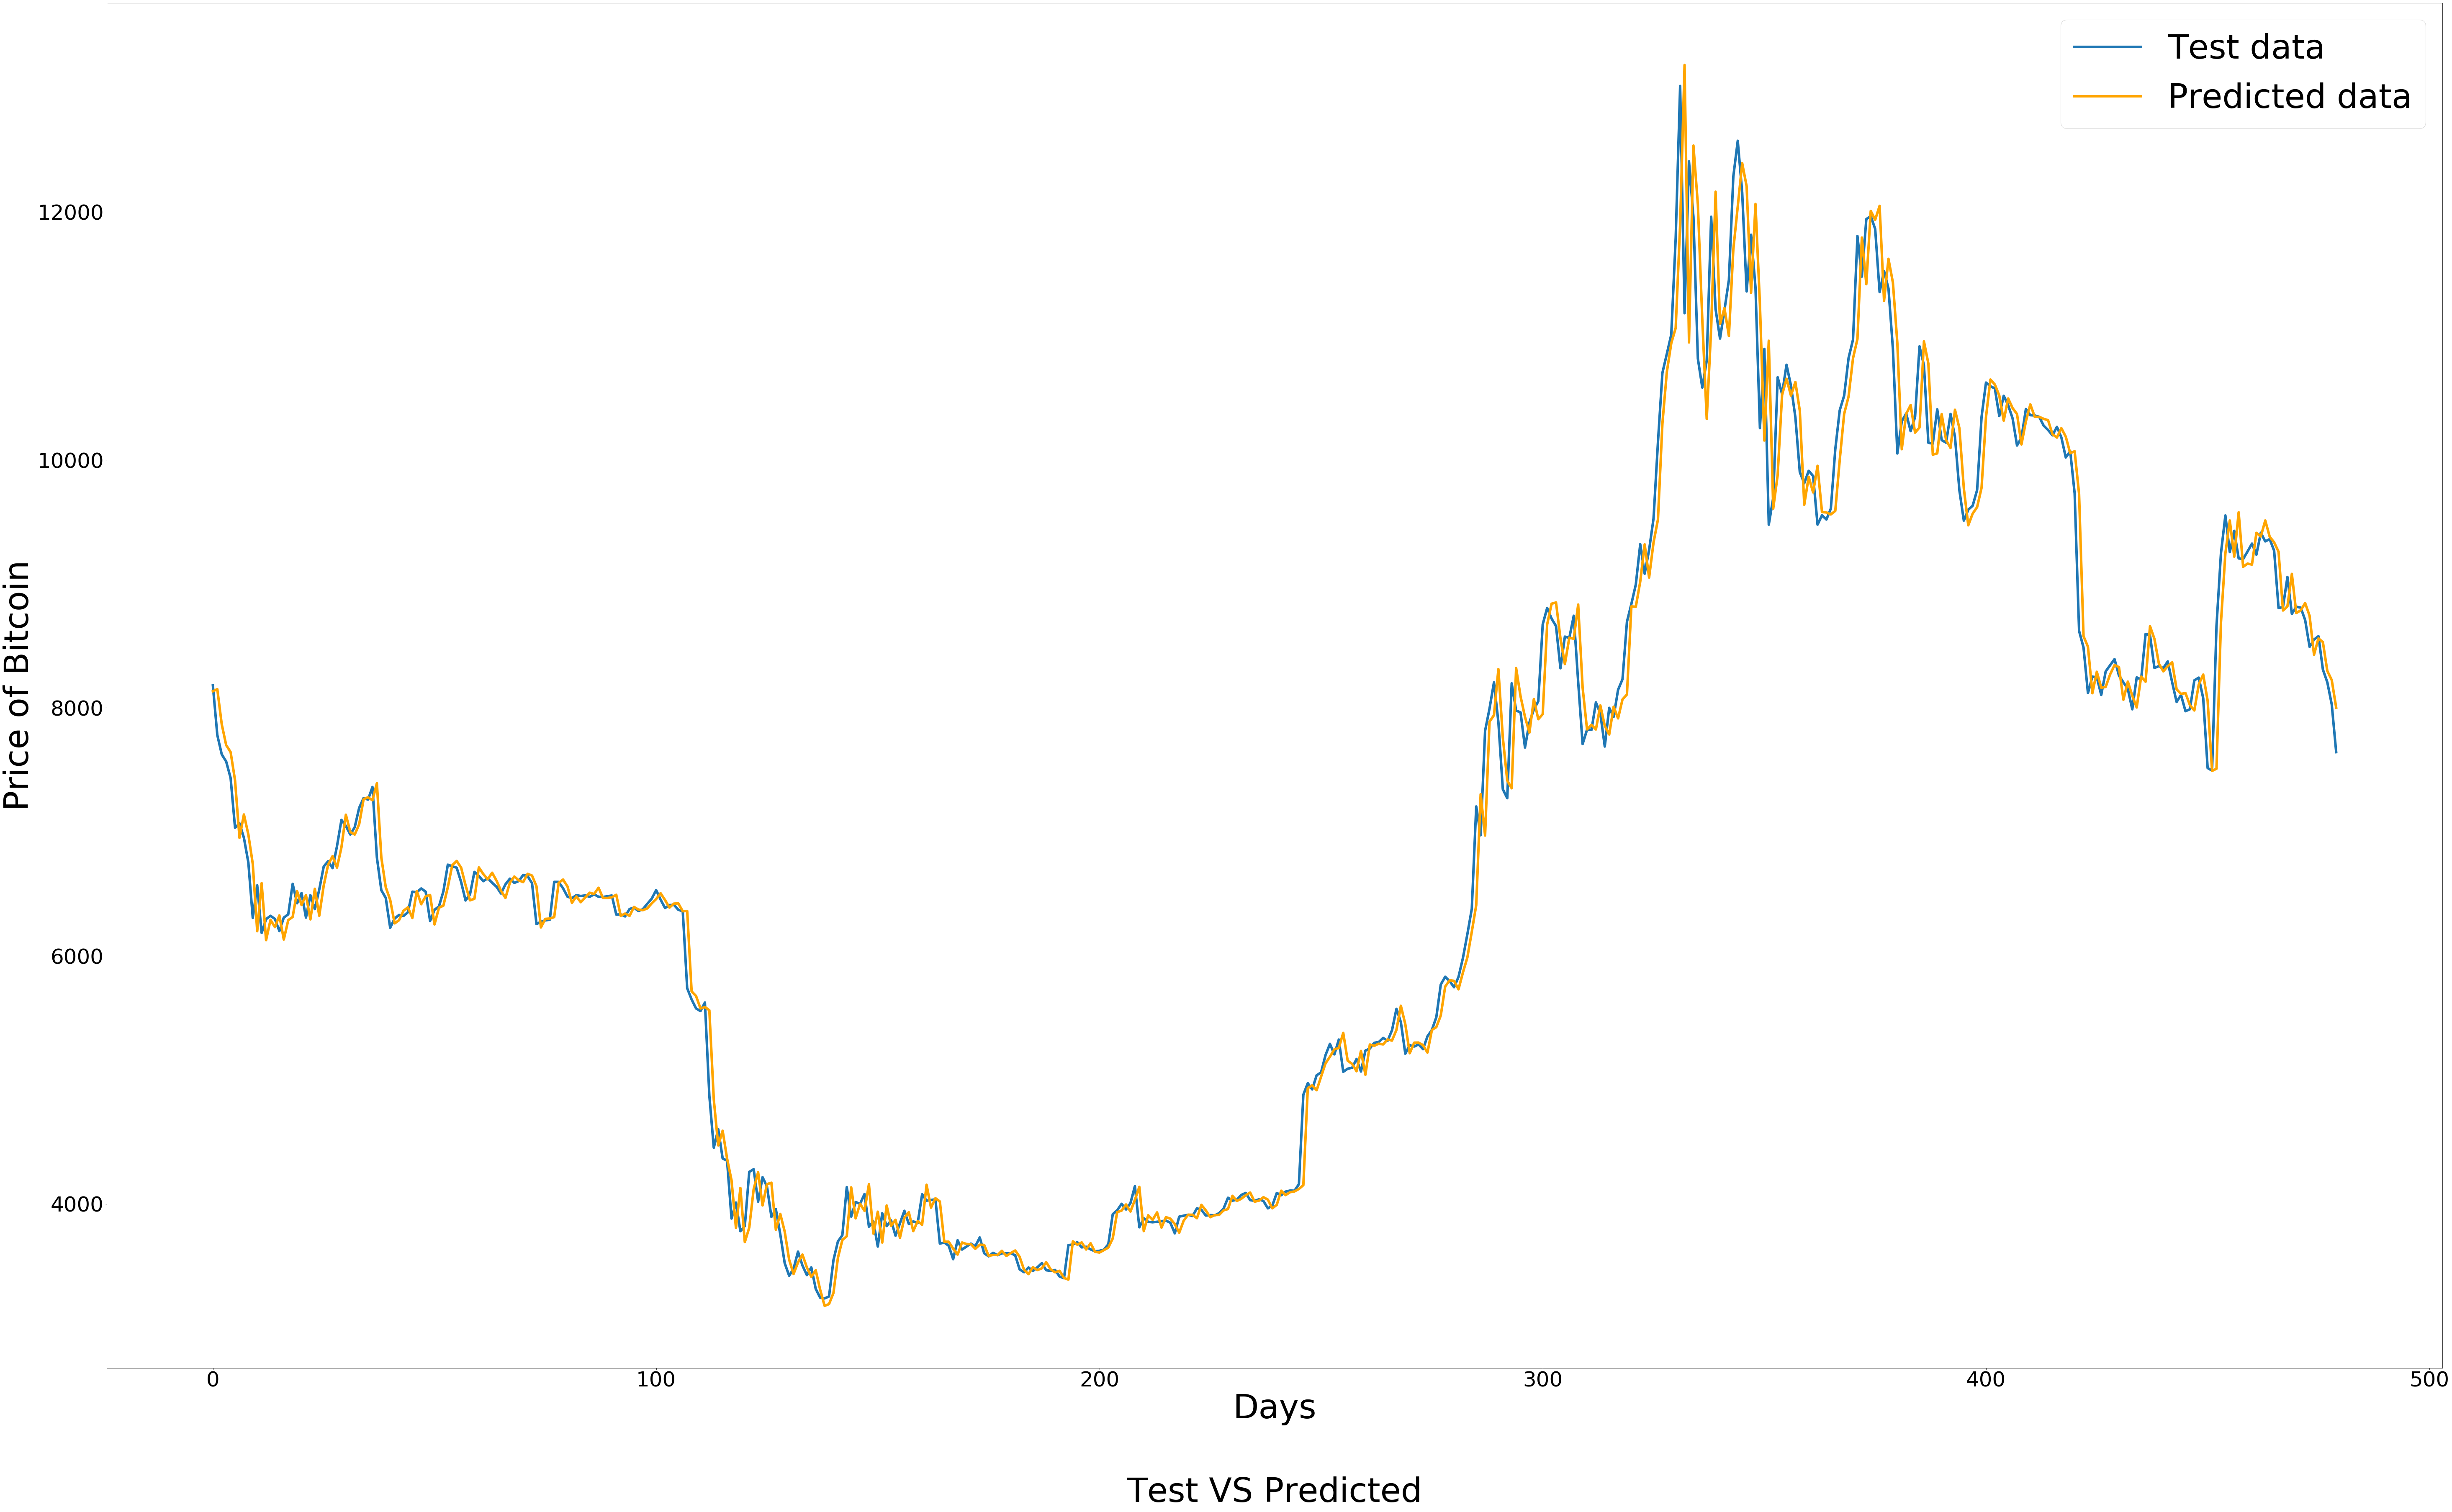

In [136]:
pyplot.plot(test, linewidth=6, label="Test data")
pyplot.plot(pred, color='orange', linewidth=6, label="Predicted data")
pyplot.rcParams["figure.figsize"] = [100,60]
pyplot.ylabel("Price of Bitcoin", fontsize=80)
pyplot.xlabel("Days", fontsize=80)
pyplot.tick_params(axis='both', which='major', labelsize=50)
pyplot.legend(loc="upper right", prop={'size': 80})
pyplot.title("Test VS Predicted", y=-0.1, fontsize=80)

### R^2 score is the coefficient of determination for the model. It is a regression score function.
### Best possible score is 1.0
### The R^2 score for ARIMA model is 0.9861

In [114]:
from sklearn.metrics import r2_score
r2_score(test,pred)

0.9861031249449231

### Mean Absolute Percentage Error (MAPE)

In [118]:
mape = np.mean(np.abs(pred - test)/np.abs(test))

In [129]:
mape*100

2.4400745424140413

### Around 2.4% MAPE implies the model is about 97.6% accurate in predicting the next observations.